# ÖDEV-1 veya ÖDEV1_EK <--yazılacaktır

### Dokümanın adı ODEV1_OgrenciNo_AdveSoyad.ipynb olmalıdır. 
### EK problemler için dosya adı  ODEV1_EK_OgrenciNo_AdveSoyad.ipynb  olmalıdır. 
#### Her iki dosyayı GTUZEM'e ÖDEV-1 bölümüne yükleyeceksiniz. 

#### Toplam 2 adet ipynb uzantılı dosya yüklenecektir. 

### Dosyaları sıkıştırıp yükleMEyiniz, olduğu gibi yükleyiniz. 


### Ön hazırlık dosyasında verilen kodlar aşağıya yazılacak:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

##--------------------KODLAR buraya eklenecek------------------------
## ....
## ....
## ....





### SORU-1

 40kHz/50kHz=M/L => M=4, L=5, hlin için formulü kullanıcak olursak hlin= [0,1/5,2/5,3/5,4/5,1,4/5,3/5,2/5,1/5,0]

## I)

<IPython.core.display.Javascript object>


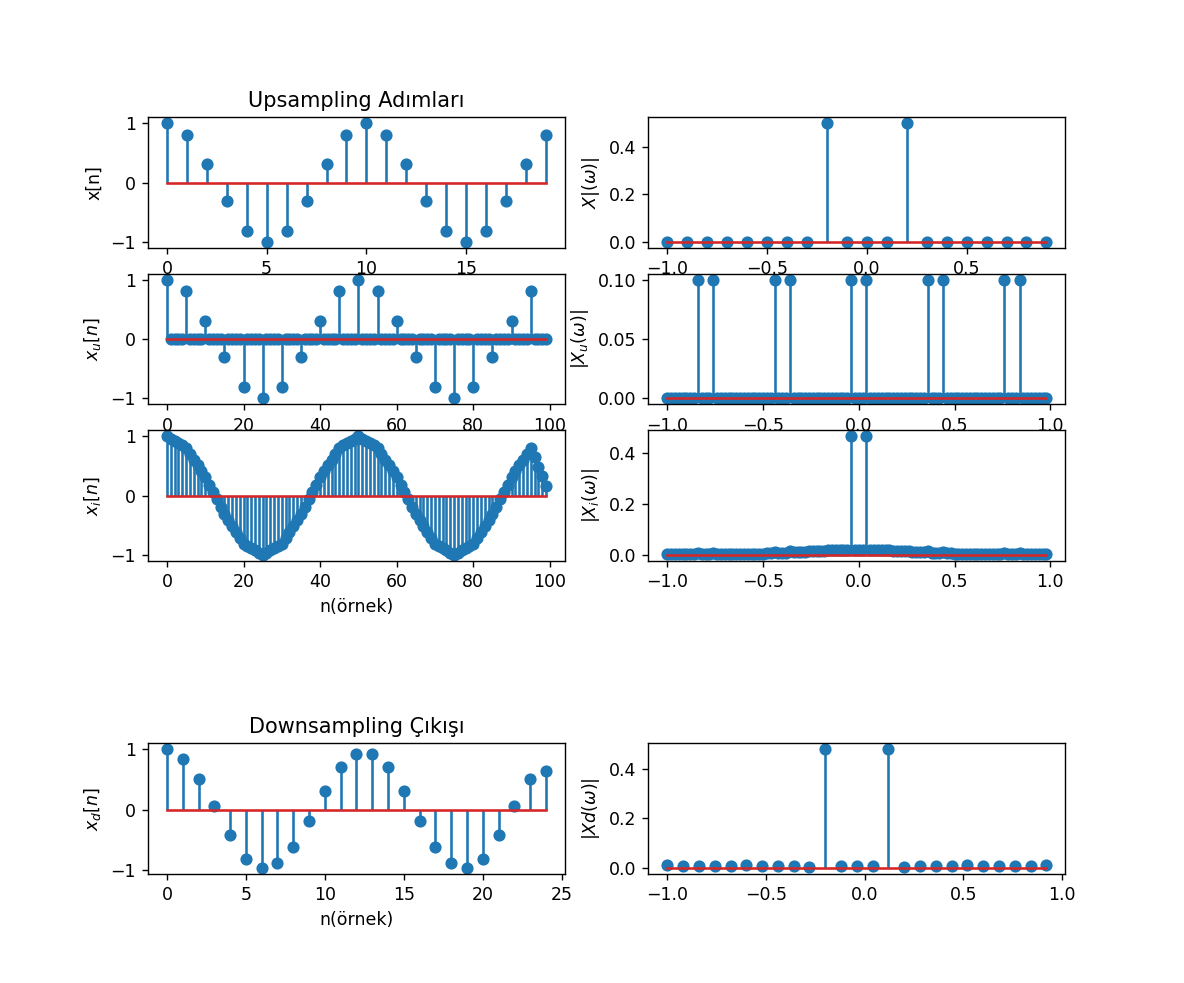

Text(0, 0.5, '$|Xd(\\omega)|$')

In [65]:
N=20
Fs=40000
Ts=1/Fs
n=np.arange(0,N)
xn=np.cos(np.pi*n/5)
L=5
M=4
hlin=np.array([0,1/5,2/5,3/5,4/5,1,4/5,3/5,2/5,1/5,0])






Nn_u = N*L
xn_u = np.zeros(Nn_u) 
xn_u[np.arange(0,len(xn_u),L)] = xn 

n_u = np.arange(0, Nn_u) 





xn_i = np.convolve(xn_u,hlin,'same')



xn_d = xn_i[np.arange(0, np.size(xn_i, 0), M)]
i_d=np.arange(0,len(xn_d))

w=np.arange(-np.pi,np.pi,np.pi/10)
w2=np.arange(-np.pi,np.pi,2*np.pi/Nn_u)
w3=np.arange(-np.pi,np.pi,2*np.pi/len(xn_d))


Xf= np.fft.fftshift(np.fft.fft(xn,N)/N) 
Xuf=  np.fft.fftshift(np.fft.fft(xn_u,Nn_u)/Nn_u) 
Xif=  np.fft.fftshift(np.fft.fft(xn_i,Nn_u)/Nn_u) 
Xdf=  np.fft.fftshift(np.fft.fft(xn_d,len(xn_d))/len(xn_d)) 


plt.figure()

plt.subplot(5,2,1)
plt.stem(n,xn)
plt.ylabel('x[n]')
plt.title('Upsampling Adımları')
plt.subplot(5,2,2)
plt.stem(w/np.pi,abs(Xf))
plt.ylabel('$X|(\omega)|$')


plt.subplot(5,2,3)
plt.stem(n_u,xn_u)
plt.ylabel('$x_u[n]$')
plt.subplot(5,2,4)
plt.stem(w2/np.pi,abs(Xuf))
plt.ylabel('$|X_u(\omega)|$')



plt.subplot(5,2,5)
plt.stem(n_u,xn_i)
plt.ylabel('$x_i[n]$')
plt.xlabel('n(örnek)')
plt.subplot(5,2,6)
plt.stem(w2/np.pi,abs(Xif))
plt.ylabel('$|X_i(\omega)|$')



plt.subplot(5,2,9)
plt.stem(i_d,xn_d)
plt.ylabel('$x_d[n]$')
plt.title('Downsampling Çıkışı')
plt.xlabel('n(örnek)')
plt.subplot(5,2,10)
plt.stem(w3/np.pi,abs(Xdf))
plt.ylabel('$|Xd(\omega)|$')





## II)

<IPython.core.display.Javascript object>


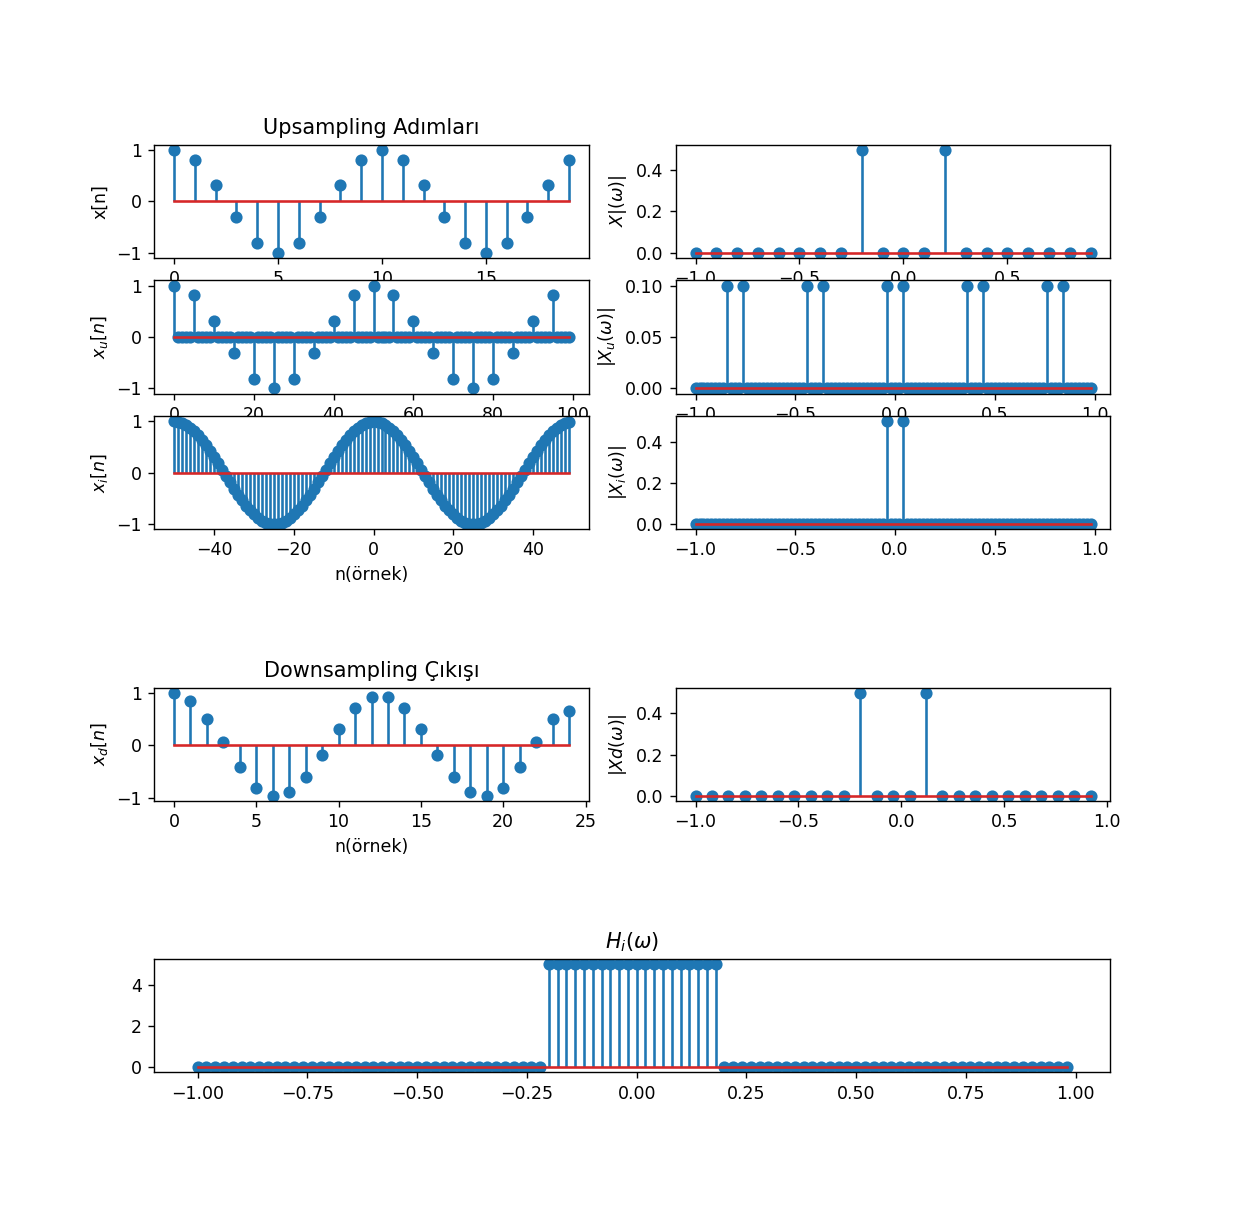

Text(0.5, 1.0, '$H_i(\\omega)$')

In [82]:
hw = np.zeros(Nn_u) 
w_i = np.arange(-(np.pi), (np.pi), 2*(np.pi)/Nn_u)
indis = np.where(abs(w_i)<=np.pi/L) 
hw[indis] = L 
Xif2=Xuf*hw
N_i =len(Xif2)
xn_i2 = np.fft.ifft(np.fft.ifftshift(Xif2), N_i)*N_i
ni =np.arange(-N_i/2, N_i/2)

xn_d2 = xn_i2[np.arange(0, np.size(xn_i2, 0), M)]
i_d2=np.arange(0,len(xn_d2))

Xdf2=  np.fft.fftshift(np.fft.fft(xn_d2,len(xn_d2))/len(xn_d2)) 
w4=np.arange(-np.pi,np.pi,2*np.pi/len(xn_d2))
w5=np.arange(-np.pi,np.pi,2*np.pi/Nn_u)


plt.figure()

plt.subplot(7,2,1)
plt.stem(n,xn)
plt.ylabel('x[n]')
plt.title('Upsampling Adımları')
plt.subplot(7,2,2)
plt.stem(w/np.pi, abs(Xf))
plt.ylabel('$X|(\omega)|$')


plt.subplot(7,2,3)
plt.stem(n_u,xn_u)
plt.ylabel('$x_u[n]$')
plt.subplot(7,2,4)
plt.stem(w2/np.pi, abs(Xuf))
plt.ylabel('$|X_u(\omega)|$')


plt.subplot(7,2,5)
plt.stem(ni,np.real(xn_i2))
plt.ylabel('$x_i[n]$')
plt.xlabel('n(örnek)')
plt.subplot(7,2,6)
plt.stem(w2/np.pi, abs(Xif2))
plt.ylabel('$|X_i(\omega)|$')


plt.subplot(7,2,9)
plt.stem(i_d,xn_d)
plt.ylabel('$x_d[n]$')
plt.title('Downsampling Çıkışı')
plt.xlabel('n(örnek)')
plt.subplot(7,2,10)
plt.stem(w4/np.pi, abs(Xdf2))
plt.ylabel('$|Xd(\omega)|$')





plt.subplot(7,2,(13,14))
plt.stem(w5/np.pi,hw)
plt.title('$H_i(\omega)$')





###       Sorunun ilk iki adımı için iki şıkta da önce sıklaştıracağımız oran - 1 kadar orjinal işaretin örneklerinin arasına 0 genliğe sahip örnekler ekledik. Bu frekans uzayında işaretin bant genişliğini sıkıştırırken aynı zamanda periyodik hale getirdi. İlk şıkta aradaki sıfır değerlerini doldurmak için zaman uzayında işareti üçgen işareti ile konvolusyon işleminden geçirdik ikincisinde ise frekans uzayında bir ideal AGF ile çarptık. Aslında bu işlem zaman uzayında sinc() fonksyonu ile konvulusyon işleminden geçirmek demek. Bu iki örneğin sonucunda sinc işareti uygulandığı zaman yani ideal AGF uygulandığı zaman upsampling çıkışında daha düzgün bir sonuç elde ettiğimizi fakat ideal AGFlerin gerçeklenemediği için pratik olarak lineer interpolasyon uyguladığımızda da downsampling çıkışında aynı işareti elde edebildiğimizi gözlemlemiş olduk.

### SORU-2

In [ ]:
##KODLAR..